# CHURN ANALYSIS

##(1).Introduction

. **Churn** refers to the situation where a
customer of a company stops using its product and leaves the company. Churn
can be anything—employee churn from a company, customer churn from a mobile
subscription, and so on.

Churn prediction is one of the most common use cases of
machine learning.

Consider a situation where you have been tasked to build a model to predict whether
a product bought by a customer will be returned or not.

In scenarios like these, classification models come into the picture. Classification is the most common type of Machine Learning.

With classification problems, accuracy is commonly chosen
as a performance metric, while the root mean square is quite common in the case
of regression.

Classification problems can generally be divided into two types:

• ***Binary classification:*** The target variable can have only two categorical values
or classes. For example, given an image, classify whether it's a cat or not a cat.

***• Multiclass classification:*** The target variable can have multiple classes. For
example, given an image, classify whether it's a cat, dog, rabbit, or bird.

In [ ]:
We will use Logistic regression

To be able to differentiate the difference of Linear Regression and Logistic Regression. Use the image below

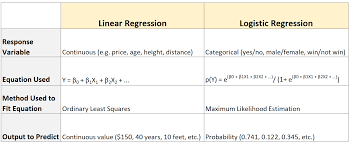
 

**Logistic regression** is one of the most widely used classification methods, and it
works well when data is linearly separable. 

The objective of logistic regression is
to squash the output of linear regression to classes 0 and 1.


With logistic regression, we still use the linear regression formula. However, we will
be squashing the output of the linear function to a range of 0 and 1 using the sigmoid
function. The sigmoid function is the inverse of the logit function:


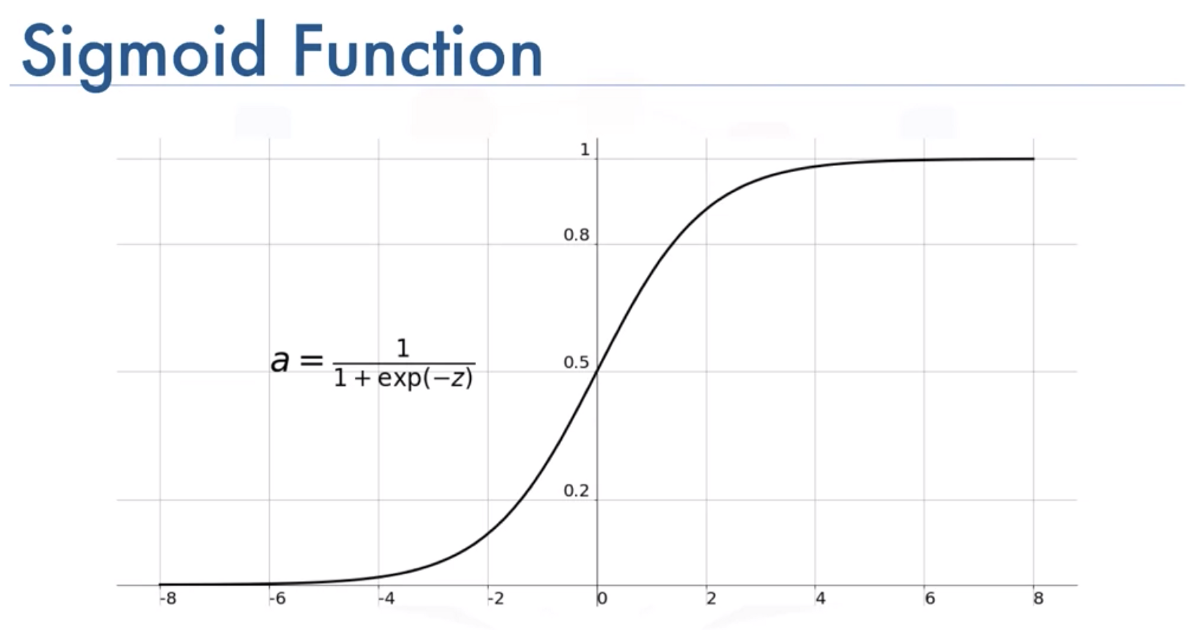

**Assumptions of Logistic Regression**

The following are the assumptions of the logistic regression algorithm:

• Unlike linear regression, logistic regression does not assume linearity between
the independent variables (x) and the target variable (y).

• The dependent variable must be binary (that is, have two categories).

• The independent variable need not have intervals, be normally distributed,
linearly related, or have equal variance within each group.

• The categories must be mutually exclusive and exhaustive

##(2).Real Life Example

### -import data

To download the data used in this example, use the following link [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00562/)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [16]:
#Load the data
df = pd.read_csv('/content/Shill Bidding Dataset.csv')


### -Inspect Data

In [17]:

#inspect the first 5 entries
df.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [18]:
#To check for consistency of the data we check the last 5 entries.
df.tail()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0
6320,15144,2481,a***l,0.016393,0.043478,0.0,0.340351,0.217391,0.993593,0.340351,0.000000,7,0


In [19]:
#Lets check the data types
df.dtypes

Record_ID                   int64
Auction_ID                  int64
Bidder_ID                  object
Bidder_Tendency           float64
Bidding_Ratio             float64
Successive_Outbidding     float64
Last_Bidding              float64
Auction_Bids              float64
Starting_Price_Average    float64
Early_Bidding             float64
Winning_Ratio             float64
Auction_Duration            int64
Class                       int64
dtype: object

In [20]:
#Lets check the info about the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


### -Clean the data

In [21]:
#First we need to drop columns that are not important. 
df.drop(["Record_ID","Auction_ID","Bidder_ID"],axis=1,\
 inplace=True)

In [22]:
#Confirm the columns that remain.
df.columns

Index(['Bidder_Tendency', 'Bidding_Ratio', 'Successive_Outbidding',
       'Last_Bidding', 'Auction_Bids', 'Starting_Price_Average',
       'Early_Bidding', 'Winning_Ratio', 'Auction_Duration', 'Class'],
      dtype='object')

In [23]:
#check the shape and head of the data. 
df.shape

(6321, 10)

In [24]:
df.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


###-Splitting the data for training and testing purposes

In [26]:
#To split data we ensure that X has all the columns except the class column whereas y has only the y column
X = df.drop("Class",axis=1)
y = df["Class"]
# Split the dataset into training and testing sets we will use 30% of the data to test so that the model can see
#more of the data.
X_train,X_test,y_train,y_test = train_test_split\
                                (X,y,test_size=0.3,\
 random_state=1, stratify=y)

In [27]:
#Print the size of training and testing the data
print("Training dataset size: {}, Testing dataset size: {}"\
 .format(X_train.shape,X_test.shape))


Training dataset size: (4424, 9), Testing dataset size: (1897, 9)


###-Logistic Regression

In [28]:
#Fit the model
logit = linear_model.LogisticRegression()
logit.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
#predict on the test data
logit.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [30]:
#Check the actual target values with y_test[:10].values:
y_test[:10].values

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

 ### -Find the score on the training and testing datasets


In [31]:
print("Score on training dataset: {}, "\
 "Score on testing dataset: {}"\
 .format(logit.score(X_train,y_train),\
 logit.score(X_test,y_test)))

Score on training dataset: 0.9794303797468354, Score on testing dataset: 0.9715340010542962
